In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


=== Dataset Sanity Checks ===
Total Reviews: 4399
Class Distribution (Before Downsampling):
label
0    0.666742
1    0.333258
Name: proportion, dtype: float64

Average Text Length:
label
0     9.061712
1    10.855389
Name: text_length, dtype: float64

Number of Duplicates: 1403

Class Distribution (After Downsampling):
label
1    0.5
0    0.5
Name: proportion, dtype: float64


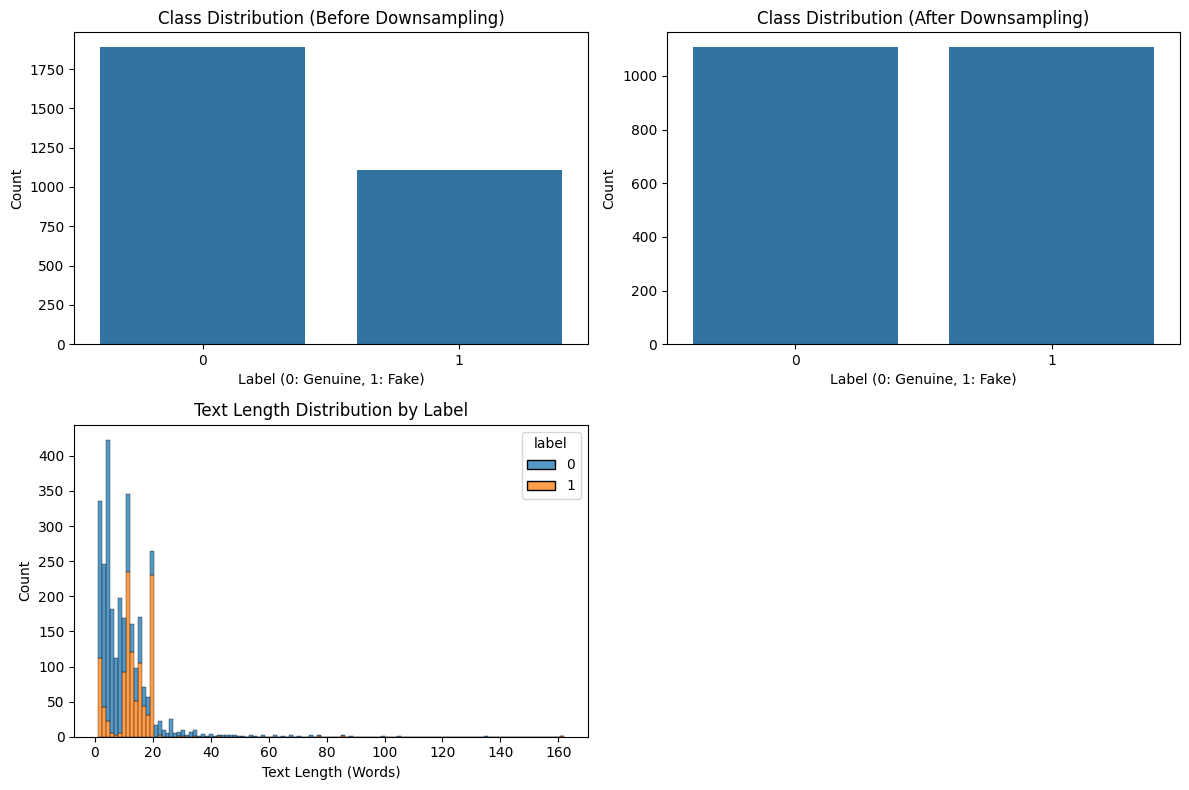

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

# Load the dataset
df = pd.read_excel("/content/drive/MyDrive/ML_End_Sem/Telugu/ML_Models_Fasttext/telugu_fasttext_features_output.xlsx")

# Data Sanity Checks
print("=== Dataset Sanity Checks ===")
print("Total Reviews:", len(df))
print("Class Distribution (Before Downsampling):")
print(df['label'].value_counts(normalize=True))

# Text Length Analysis
df['text_length'] = df['comment'].apply(lambda x: len(str(x).split()))
print("\nAverage Text Length:")
print(df.groupby('label')['text_length'].mean())

# Duplicate Check
duplicates = df.duplicated().sum()
print("\nNumber of Duplicates:", duplicates)
df = df.drop_duplicates()

# Downsampling
# Separate majority and minority classes
df_majority = df[df['label'] == 0]  # Genuine
df_minority = df[df['label'] == 1]  # Fake

# Downsample majority class
df_majority_downsampled = resample(df_majority,
                                  replace=False,
                                  n_samples=len(df_minority),
                                  random_state=42)

# Combine minority and downsampled majority
df_balanced = pd.concat([df_minority, df_majority_downsampled])

# Save balanced dataset
df_balanced.to_excel("telugu_fasttext_balanced.xlsx", index=False)

# Class Distribution After Downsampling
print("\nClass Distribution (After Downsampling):")
print(df_balanced['label'].value_counts(normalize=True))

# Visualizations
plt.figure(figsize=(12, 8))

# Class Distribution Before Downsampling
plt.subplot(2, 2, 1)
sns.countplot(x='label', data=df)
plt.title("Class Distribution (Before Downsampling)")
plt.xlabel("Label (0: Genuine, 1: Fake)")
plt.ylabel("Count")

# Class Distribution After Downsampling
plt.subplot(2, 2, 2)
sns.countplot(x='label', data=df_balanced)
plt.title("Class Distribution (After Downsampling)")
plt.xlabel("Label (0: Genuine, 1: Fake)")
plt.ylabel("Count")

# Text Length Distribution
plt.subplot(2, 2, 3)
sns.histplot(data=df, x='text_length', hue='label', multiple='stack')
plt.title("Text Length Distribution by Label")
plt.xlabel("Text Length (Words)")
plt.ylabel("Count")

plt.tight_layout()
plt.savefig("data_sanity_plots.png")
plt.show()

# Save Sanity Check Summary
sanity_summary = {
    "Total Reviews": len(df),
    "Fake (%)": df['label'].mean() * 100,
    "Genuine (%)": (1 - df['label'].mean()) * 100,
    "Avg Text Length (Fake)": df[df['label'] == 1]['text_length'].mean(),
    "Avg Text Length (Genuine)": df[df['label'] == 0]['text_length'].mean(),
    "Duplicates Removed": duplicates,
    "Balanced Fake (%)": df_balanced['label'].mean() * 100,
    "Balanced Genuine (%)": (1 - df_balanced['label'].mean()) * 100
}
pd.DataFrame([sanity_summary]).to_csv("sanity_summary.csv", index=False)

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load balanced dataset
df = pd.read_excel("/content/telugu_fasttext_balanced.xlsx")

# Features and labels
X = df[[f'ft_{i}' for i in range(300)]]
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize results storage
results = {'Model': [], 'Train Accuracy': [], 'Test Accuracy': []}


K-Nearest Neighbors (KNN)


=== KNN ===
Train Accuracy: 0.8780350084697911
Test Accuracy: 0.8171557562076749
              precision    recall  f1-score   support

           0       0.85      0.78      0.81       223
           1       0.79      0.86      0.82       220

    accuracy                           0.82       443
   macro avg       0.82      0.82      0.82       443
weighted avg       0.82      0.82      0.82       443

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       884
           1       0.89      0.87      0.88       887

    accuracy                           0.88      1771
   macro avg       0.88      0.88      0.88      1771
weighted avg       0.88      0.88      0.88      1771



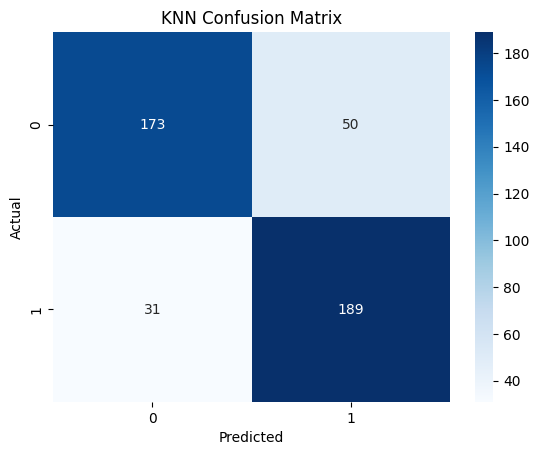

In [15]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
results['Model'].append('KNN')
results['Train Accuracy'].append(train_acc)
results['Test Accuracy'].append(test_acc)

print("\n=== KNN ===")
print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)
print(classification_report(y_test, y_test_pred))
print(classification_report(y_train, y_train_pred))

sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


XGBoost

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:43:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



=== XGBoost ===
Train Accuracy: 0.9983060417843026
Test Accuracy: 0.8781038374717833
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       223
           1       0.90      0.85      0.87       220

    accuracy                           0.88       443
   macro avg       0.88      0.88      0.88       443
weighted avg       0.88      0.88      0.88       443

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       884
           1       1.00      1.00      1.00       887

    accuracy                           1.00      1771
   macro avg       1.00      1.00      1.00      1771
weighted avg       1.00      1.00      1.00      1771



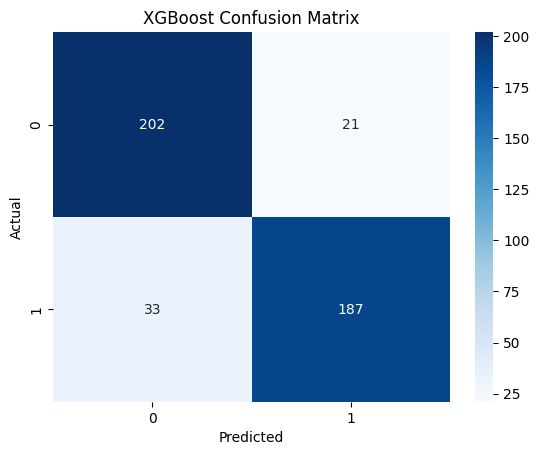

In [16]:
from xgboost import XGBClassifier

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
results['Model'].append('XGBoost')
results['Train Accuracy'].append(train_acc)
results['Test Accuracy'].append(test_acc)

print("\n=== XGBoost ===")
print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)
print(classification_report(y_test, y_test_pred))
print(classification_report(y_train, y_train_pred))

sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Random Forest



=== Random Forest ===
Train Accuracy: 0.9983060417843026
Test Accuracy: 0.891647855530474
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       223
           1       0.95      0.83      0.88       220

    accuracy                           0.89       443
   macro avg       0.90      0.89      0.89       443
weighted avg       0.90      0.89      0.89       443

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       884
           1       1.00      1.00      1.00       887

    accuracy                           1.00      1771
   macro avg       1.00      1.00      1.00      1771
weighted avg       1.00      1.00      1.00      1771



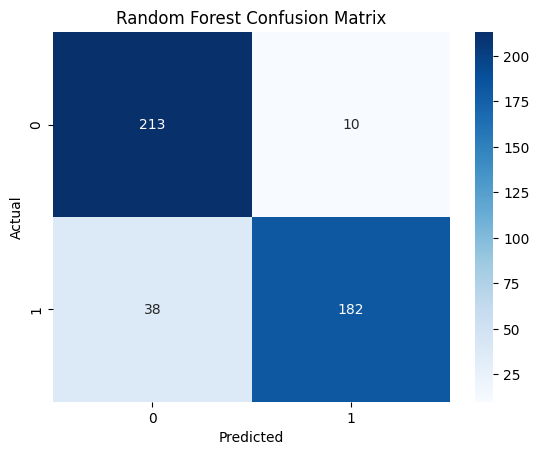

In [17]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
results['Model'].append('Random Forest')
results['Train Accuracy'].append(train_acc)
results['Test Accuracy'].append(test_acc)

print("\n=== Random Forest ===")
print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)
print(classification_report(y_test, y_test_pred))
print(classification_report(y_train, y_train_pred))

sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



Decision Tree






=== Decision Tree ===
Train Accuracy: 0.9983060417843026
Test Accuracy: 0.7900677200902935
              precision    recall  f1-score   support

           0       0.82      0.75      0.78       223
           1       0.77      0.83      0.80       220

    accuracy                           0.79       443
   macro avg       0.79      0.79      0.79       443
weighted avg       0.79      0.79      0.79       443

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       884
           1       1.00      1.00      1.00       887

    accuracy                           1.00      1771
   macro avg       1.00      1.00      1.00      1771
weighted avg       1.00      1.00      1.00      1771



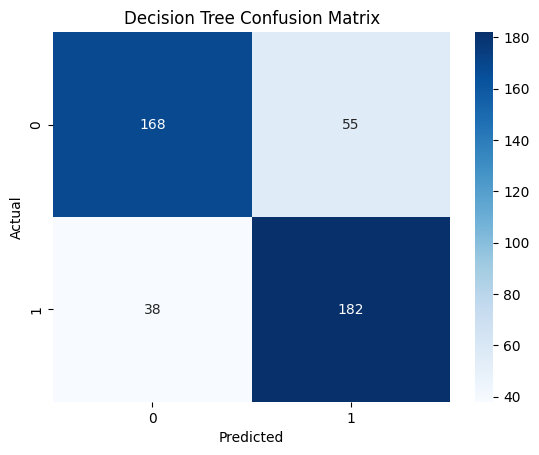

In [19]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
results['Model'].append('Decision Tree')
results['Train Accuracy'].append(train_acc)
results['Test Accuracy'].append(test_acc)

print("\n=== Decision Tree ===")
print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)
print(classification_report(y_test, y_test_pred))
print(classification_report(y_train, y_train_pred))


sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


MLP (Neural Network)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



=== MLP ===
Train Accuracy: 0.9971767363071711
Test Accuracy: 0.837471783295711
              precision    recall  f1-score   support

           0       0.87      0.80      0.83       223
           1       0.81      0.88      0.84       220

    accuracy                           0.84       443
   macro avg       0.84      0.84      0.84       443
weighted avg       0.84      0.84      0.84       443

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       884
           1       1.00      1.00      1.00       887

    accuracy                           1.00      1771
   macro avg       1.00      1.00      1.00      1771
weighted avg       1.00      1.00      1.00      1771



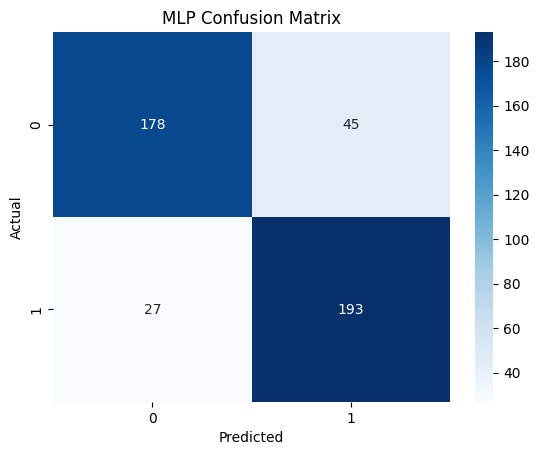

In [21]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
results['Model'].append('MLP')
results['Train Accuracy'].append(train_acc)
results['Test Accuracy'].append(test_acc)

print("\n=== MLP ===")
print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)
print(classification_report(y_test, y_test_pred))
print(classification_report(y_train, y_train_pred))


sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title("MLP Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Support Vector Machine (SVM)


=== SVM ===
Train Accuracy: 0.9316770186335404
Test Accuracy: 0.9006772009029346
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       223
           1       0.96      0.83      0.89       220

    accuracy                           0.90       443
   macro avg       0.91      0.90      0.90       443
weighted avg       0.91      0.90      0.90       443

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       884
           1       0.99      0.88      0.93       887

    accuracy                           0.93      1771
   macro avg       0.94      0.93      0.93      1771
weighted avg       0.94      0.93      0.93      1771



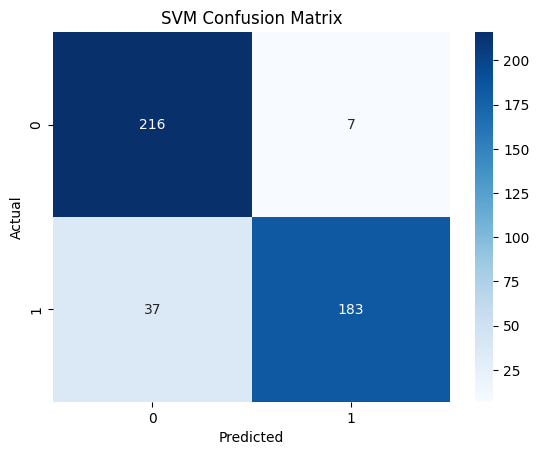

In [23]:
from sklearn.svm import SVC

model = SVC(probability=True, random_state=42)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
results['Model'].append('SVM')
results['Train Accuracy'].append(train_acc)
results['Test Accuracy'].append(test_acc)

print("\n=== SVM ===")
print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)
print(classification_report(y_test, y_test_pred))
print(classification_report(y_train, y_train_pred))

sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Naive Bayes



=== Naive Bayes ===
Train Accuracy: 0.766798418972332
Test Accuracy: 0.7674943566591422
              precision    recall  f1-score   support

           0       0.83      0.67      0.74       223
           1       0.72      0.86      0.79       220

    accuracy                           0.77       443
   macro avg       0.78      0.77      0.77       443
weighted avg       0.78      0.77      0.77       443

              precision    recall  f1-score   support

           0       0.85      0.64      0.73       884
           1       0.71      0.89      0.79       887

    accuracy                           0.77      1771
   macro avg       0.78      0.77      0.76      1771
weighted avg       0.78      0.77      0.76      1771



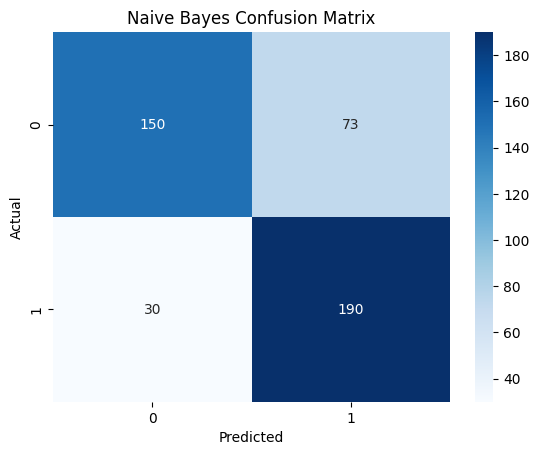

In [26]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
results['Model'].append('Naive Bayes')
results['Train Accuracy'].append(train_acc)
results['Test Accuracy'].append(test_acc)

print("\n=== Naive Bayes ===")
print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)
print(classification_report(y_test, y_test_pred))
print(classification_report(y_train, y_train_pred))

sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Stacking Classifier

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:49:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:50:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:50:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:50:16] WARNING: /workspace/src/learner.cc:740: 
Parameter


=== Stacking Classifier ===
Train Accuracy: 0.9977413890457368
Test Accuracy: 0.8893905191873589
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       223
           1       0.91      0.86      0.89       220

    accuracy                           0.89       443
   macro avg       0.89      0.89      0.89       443
weighted avg       0.89      0.89      0.89       443

Train Accuracy: 0.8893905191873589
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       884
           1       1.00      1.00      1.00       887

    accuracy                           1.00      1771
   macro avg       1.00      1.00      1.00      1771
weighted avg       1.00      1.00      1.00      1771



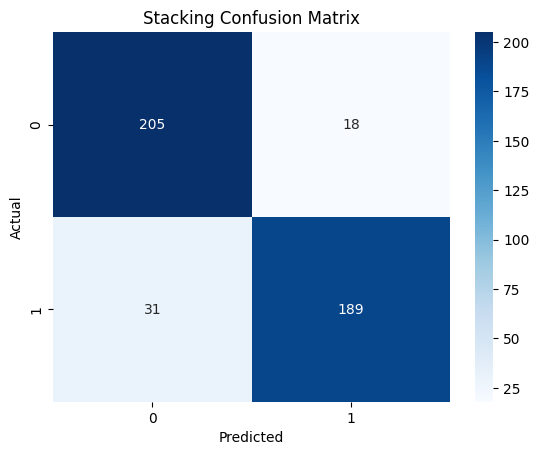

In [28]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Define base models again
base_models = [
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('XGB', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)),
    ('RF', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('DT', DecisionTreeClassifier(random_state=42)),
    ('MLP', MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)),
    ('SVM', SVC(probability=True, random_state=42)),
    ('NB', GaussianNB())
]

model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression(), cv=5)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
results['Model'].append('Stacking')
results['Train Accuracy'].append(train_acc)
results['Test Accuracy'].append(test_acc)

print("\n=== Stacking Classifier ===")
print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)
print(classification_report(y_test, y_test_pred))

print("Train Accuracy:", test_acc)
print(classification_report(y_train, y_train_pred))

sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Stacking Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


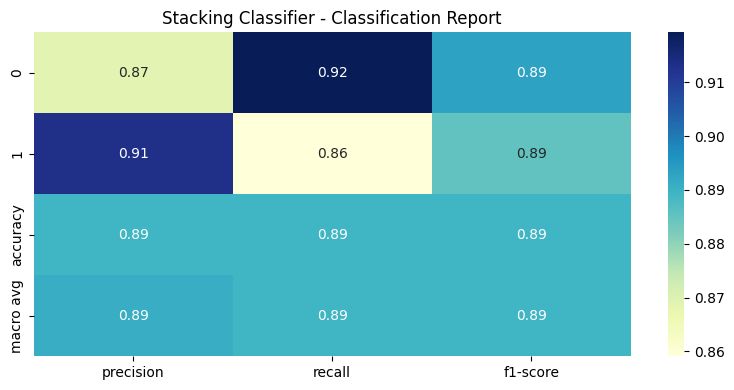

In [29]:
from sklearn.metrics import classification_report
import pandas as pd

report = classification_report(y_test, y_test_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 4))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Stacking Classifier - Classification Report")
plt.tight_layout()
plt.show()


Final Accuracy Comparison Plot (Run After All Models)

            Model  Train Accuracy  Test Accuracy
0             KNN        0.878035       0.817156
1         XGBoost        0.998306       0.878104
2   Random Forest        0.998306       0.891648
6   Decision Tree        0.998306       0.790068
8             MLP        0.842462       0.860045
10            SVM        0.931677       0.900677
12    Naive Bayes        0.766798       0.767494
15       Stacking        0.997741       0.889391


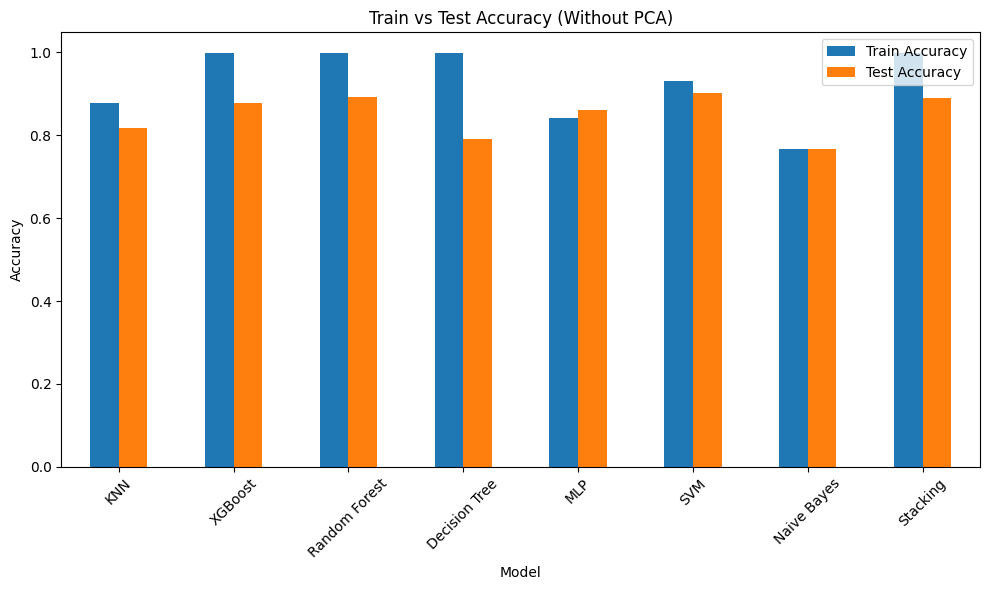

In [33]:
results_df = pd.DataFrame(results)
results_df = results_df.drop_duplicates(subset='Model')  # Drop duplicate models
print(results_df)

results_df.set_index('Model')[['Train Accuracy', 'Test Accuracy']].plot(kind='bar', figsize=(10, 6))
plt.title("Train vs Test Accuracy (Without PCA)")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("accuracy_comparison_without_pca.png")
plt.show()

# Save results
results_df.to_csv("model_results_without_pca.csv", index=False)
